<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
mu_vec1= np.array([0,0,0])
cov_mat1= np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample=np.random.multivariate_normal(mu_vec1,cov_mat1,20)
class1_sample

df= pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target']= 1

mu_vec2= np.array([1,1,1])
cov_mat2= np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample=np.random.multivariate_normal(mu_vec2,cov_mat2,20)
class2_sample

df1= pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])
df1['target']= 0


df = pd.concat([df, df1], ignore_index=True)
df=df.sample(40)

In [40]:
df.head()

,feature1,feature2,feature3,target
10,1.162353,-0.804668,0.844507,1
25,0.931433,0.692037,1.412910,0
8,-1.033822,-0.801397,-1.321801,1
26,-0.772029,0.415275,-0.310379,0
7,-1.194053,-0.052944,0.057580,1


In [41]:
import plotly.express as px
fig = px.scatter_3d(df, x='feature1', y='feature2', z='feature3',
              color='target')
fig.update_traces(marker= dict(size=12,
                               line= dict(width=2,
                                          color= "DarkSlateGrey")),
                  selector=dict(mode='markers'))
fig.show()

In [42]:
 #standard scaling
 from sklearn.preprocessing import StandardScaler
 ss= StandardScaler()
 df[['feature1','feature2','feature3']]= ss.fit_transform(df[['feature1','feature2','feature3']])

In [43]:
df.head()

,feature1,feature2,feature3,target
10,1.162353,-0.804668,0.844507,1
25,0.931433,0.692037,1.412910,0
8,-1.033822,-0.801397,-1.321801,1
26,-0.772029,0.415275,-0.310379,0
7,-1.194053,-0.052944,0.057580,1


In [44]:
#find cov matrix
cov_mat= np.cov([df.iloc[:,0], df.iloc[:,1],df.iloc[:,2]])
cov_mat

array([[1.02564103, 0.3594249 , 0.13824885],
       [0.3594249 , 1.02564103, 0.24989783],
       [0.13824885, 0.24989783, 1.02564103]])

In [45]:
#eigen value and vectors
eigen_values, eigen_vectors= np.linalg.eig(cov_mat)
print(eigen_values)
print(eigen_vectors)

[1.53505249 0.64395932 0.89791127]
[[-0.58912851 -0.60646792 -0.53397028]
 [-0.65069332  0.74786798 -0.13149787]
 [-0.47908852 -0.26998175  0.83521497]]


In [12]:
np.sqrt(33)

5.744562646538029

In [46]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

Populating the interactive namespace from numpy and matplotlib


In [47]:
class Arrow3D(FancyArrowPatch):
  def __init__(self, xs, ys, zs, *args, **kwargs):
    FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
    self._verts3d = xs, ys, zs

  def draw(self, renderer):
    xs3d, ys3d, zs3d = self._verts3d
    xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
    self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
    FancyArrowPatch.draw(self, renderer)

  def do_3d_projection(self, renderer=None):
    xs3d, ys3d, zs3d = self._verts3d
    xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
    return zs


In [ ]:
fig= plt.figure(figsize=(7,7))
ax= fig.add_subplot(111, projection='3d')

ax.plot(df["feature1"], df["feature2"], df["feature3"],
        'o', markersize=8,  color="blue", alpha=0.2)

ax.plot([df["feature1"].mean()], [df["feature2"].mean()],
        [df["feature3"].mean()],
        'o', markersize=10, color="red",alpha=0.5)

for v in eigen_vectors.T:
  a= Arrow3D([df["feature1"].mean(),v[0]],
             [df["feature2"].mean(),v[1]],
             [df["feature3"].mean(),v[2]],
             mutation_scale=20,
             lw=3, arrowstyle="-|>", color="r")
  ax.add_artist(a)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title("Eigenvectors")
plt.show()

In [49]:
pc=eigen_vectors[0:2]
pc #for 3x2

array([[-0.58912851, -0.60646792, -0.53397028],
       [-0.65069332,  0.74786798, -0.13149787]])

In [52]:
transformed_df= np.dot(df.iloc[:, 0:3], pc.T)
new_df= pd.DataFrame(transformed_df, columns=['pc1','pc2'])
new_df['target']= df['target']
new_df.head()

,pc1,pc2,target
0,-0.647711,-1.469172,1
1,-1.722884,-0.274320,1
2,1.800878,0.247176,1
3,0.368706,0.853739,1
4,0.704814,0.729795,1


In [54]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['pc1'],
                 y=new_df['pc2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

MNIST


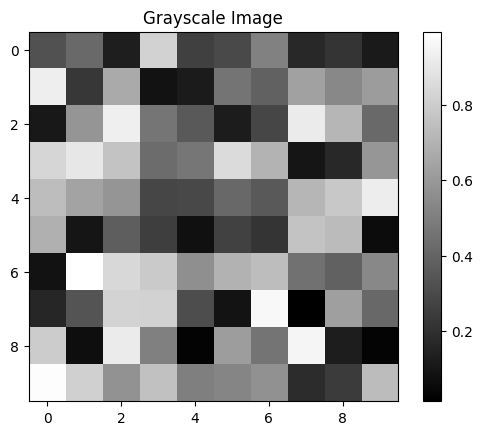

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D array representing a grayscale image
image = np.random.random((10, 10))

# Display the image
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.colorbar()  # Optional: Add a color bar to show the scale
plt.title("Grayscale Image")
plt.show()


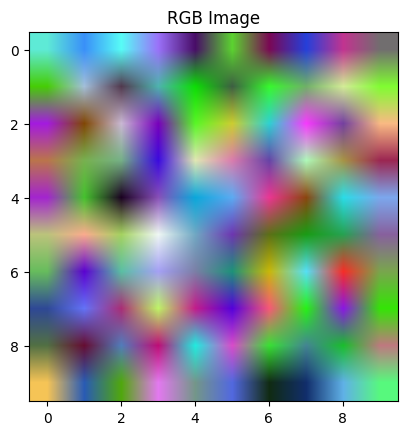

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3D array representing an RGB image
image = np.random.random((10, 10, 3))

# Display the image
plt.imshow(image, interpolation='bilinear')
plt.title("RGB Image")
plt.show()
